<a href="https://colab.research.google.com/github/J-Kiruthika/AndroidDevApps/blob/master/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 150)
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


# matplotlib and seaborn for plotting
import matplotlib
matplotlib.rcParams['figure.dpi'] = 120 #resolution
matplotlib.rcParams['figure.figsize'] = (8,6) #figure size
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
color = sns.color_palette()
root = "/gdrive/MyDrive/data_hackerearth/"

In [ ]:
aisles = pd.read_csv(root + 'aisles.csv')
departments = pd.read_csv(root + 'departments.csv')
orders = pd.read_csv(root + 'orders.csv')
order_products_prior = pd.read_csv(root + 'order_products__prior.csv')
order_products_train = pd.read_csv(root + 'order_products__train.csv')
products = pd.read_csv(root + 'products.csv')

In [ ]:
order_products = order_products_prior.append(order_products_train)
order_products.shape

(33819106, 4)

In [ ]:
order_products = order_products.merge(products, on ='product_id', how='left')
order_products = order_products.merge(aisles, on ='aisle_id', how='left')
order_products = order_products.merge(departments, on ='department_id', how='left')
order_products = order_products.merge(orders, on='order_id', how='left')
order_products.shape

(33819106, 15)

In [ ]:
temp_df = order_products.groupby("aisle")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()


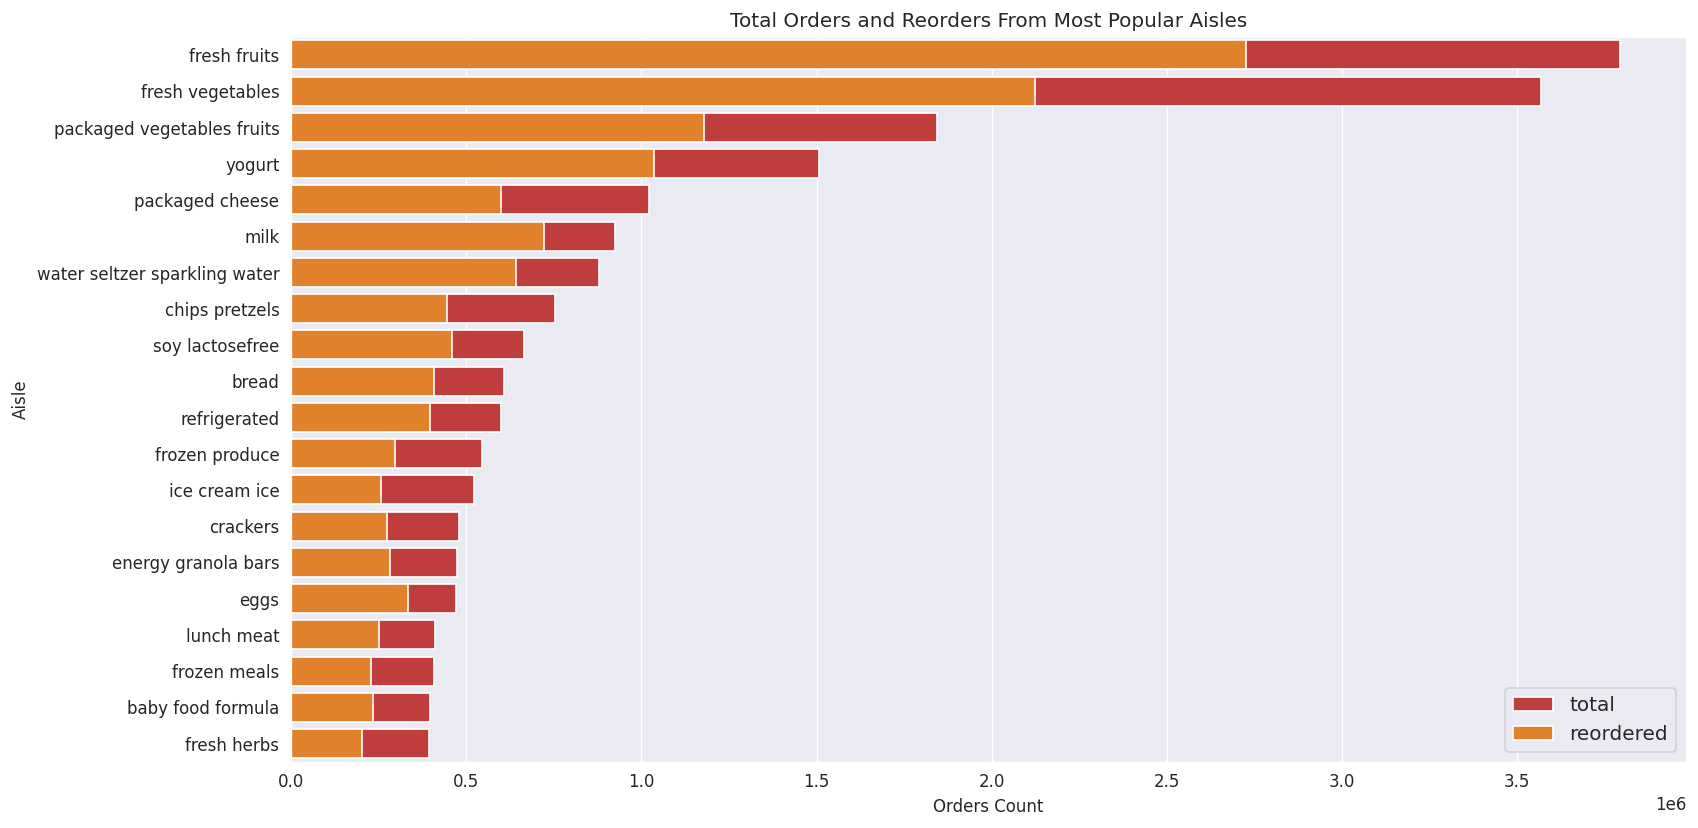

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.total[0:20], color=color[3], label = "total")
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.reorders[0:20], color=color[1], label = "reordered")
ax.set_ylabel("Aisle")
ax.set_xlabel("Orders Count")
ax.set_title("Total Orders and Reorders From Most Popular Aisles")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

In [ ]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df = temp_df.sort_values("reorder_ratio", ascending=False).reset_index()

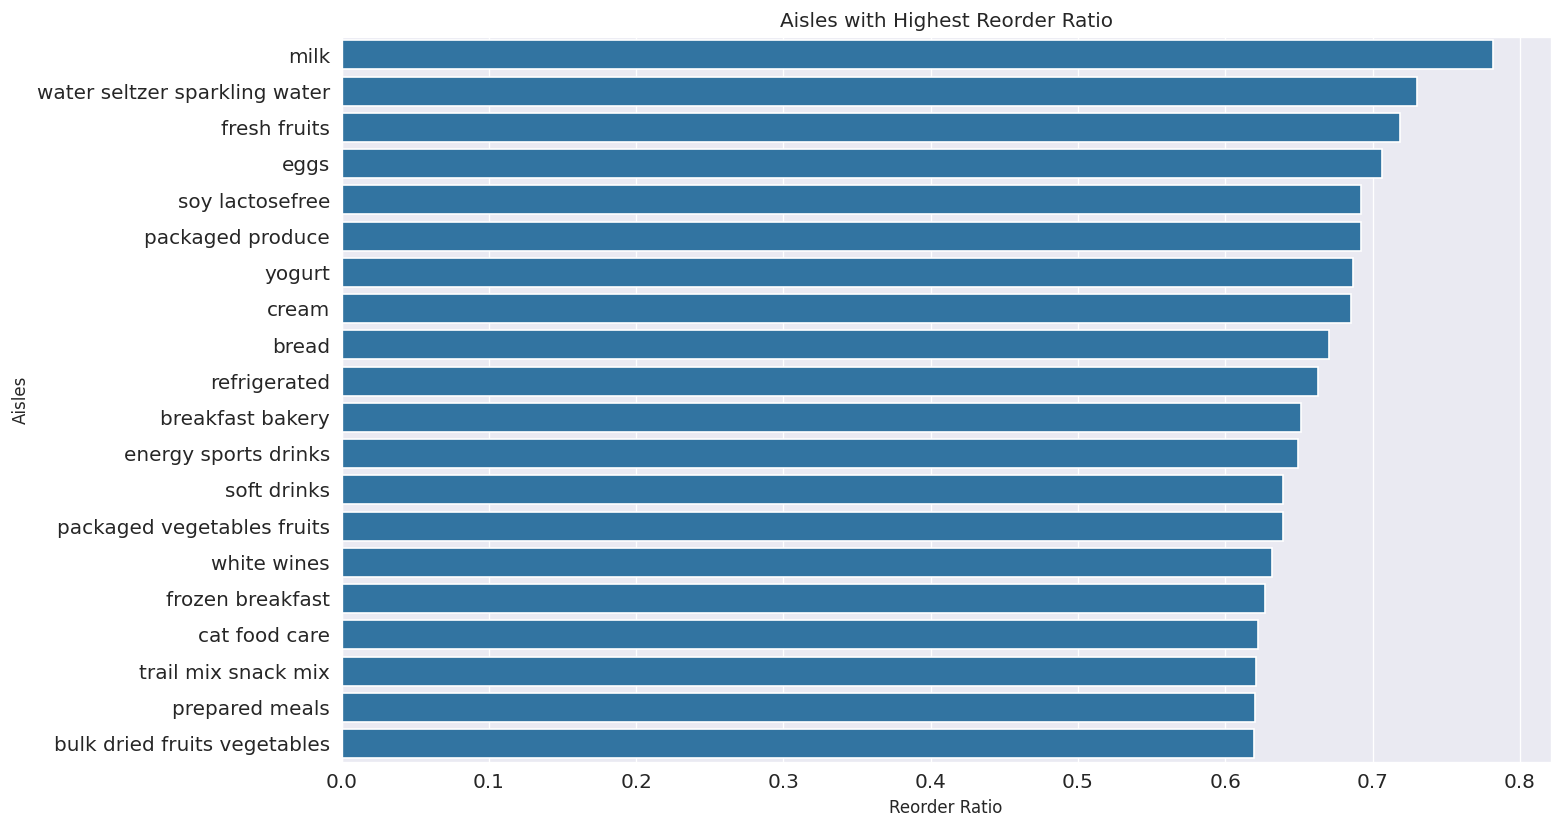

In [ ]:
fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.reorder_ratio[0:20], color=color[0])
ax.set_ylabel("Aisles")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Aisles with Highest Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

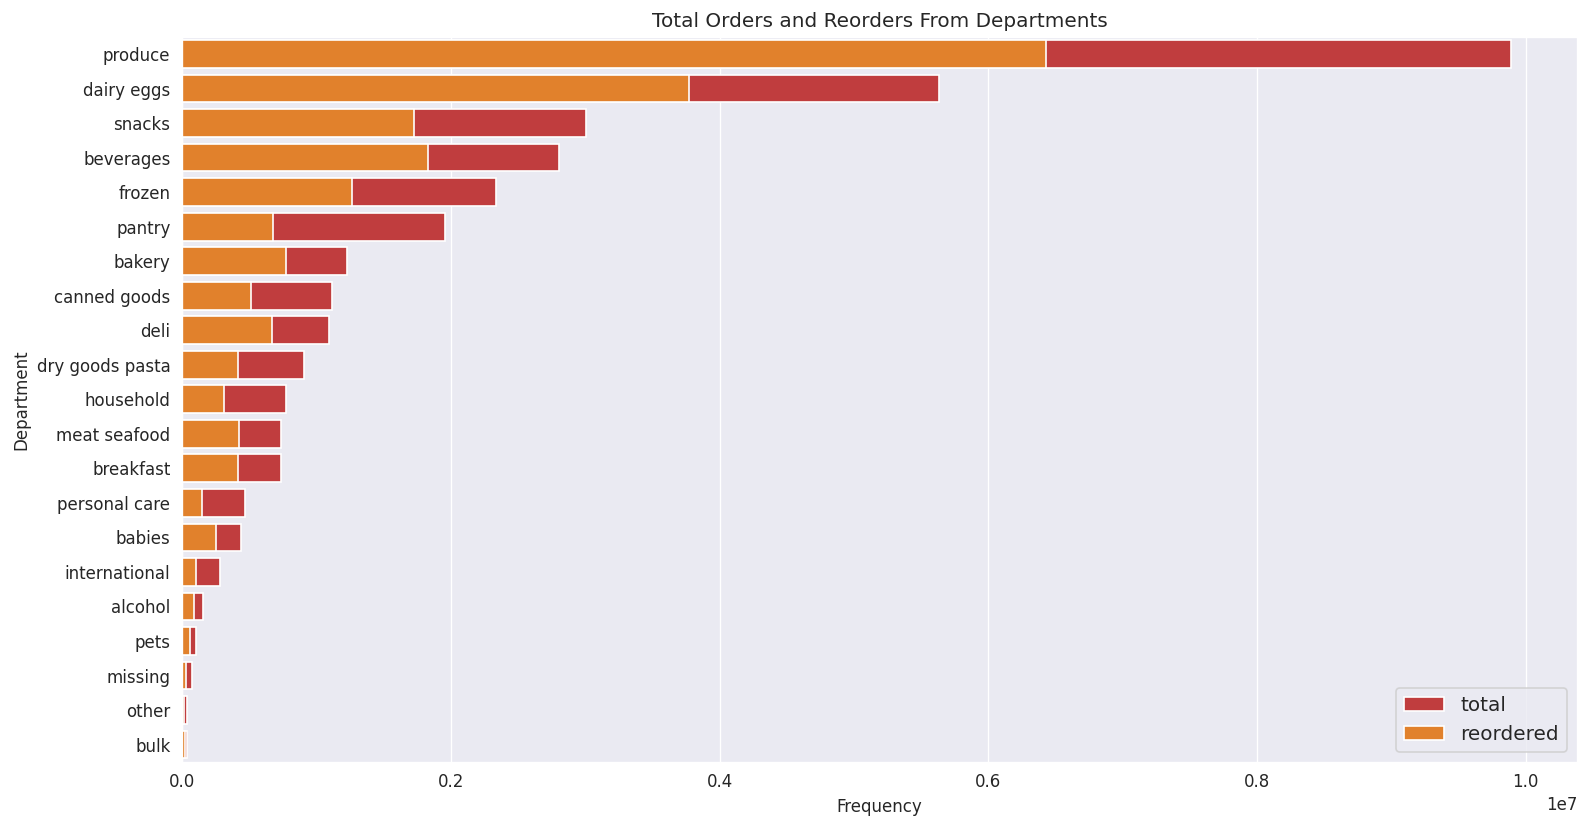

In [ ]:
temp_df = order_products.groupby("department")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()


fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_df.department, x = temp_df["total"], color=color[3], label = "total")
ax = sns.barplot(y = temp_df.department, x = temp_df["reorders"], color=color[1], label = "reordered")
ax.set_ylabel("Department")
ax.set_xlabel("Frequency")
ax.legend(loc = 4, prop={'size': 12})
ax.set_title("Total Orders and Reorders From Departments")
plt.show()


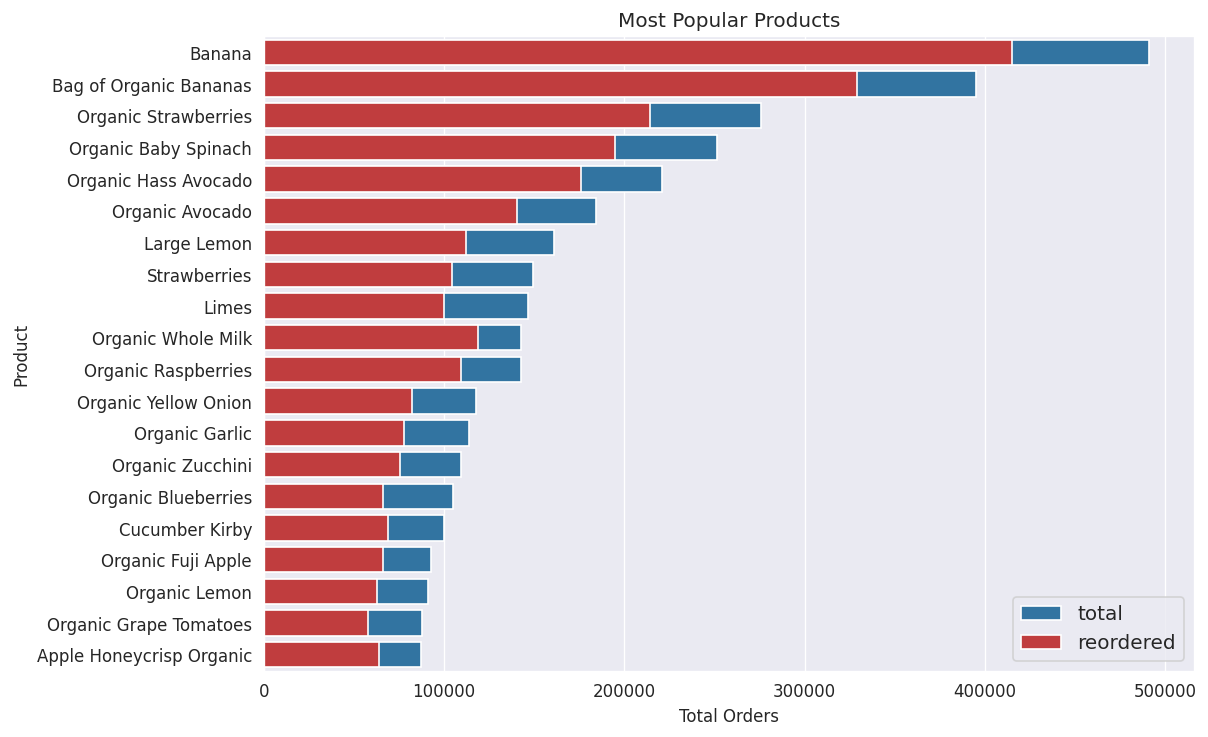

In [ ]:
temp_df = order_products.groupby("product_name")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()

fig, ax = plt.subplots(figsize = (10,7))
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.total[0:20], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.reorders[0:20], color=color[3], label = "reordered")
ax.set_ylabel("Product")
ax.set_xlabel("Total Orders")
ax.set_title("Most Popular Products")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

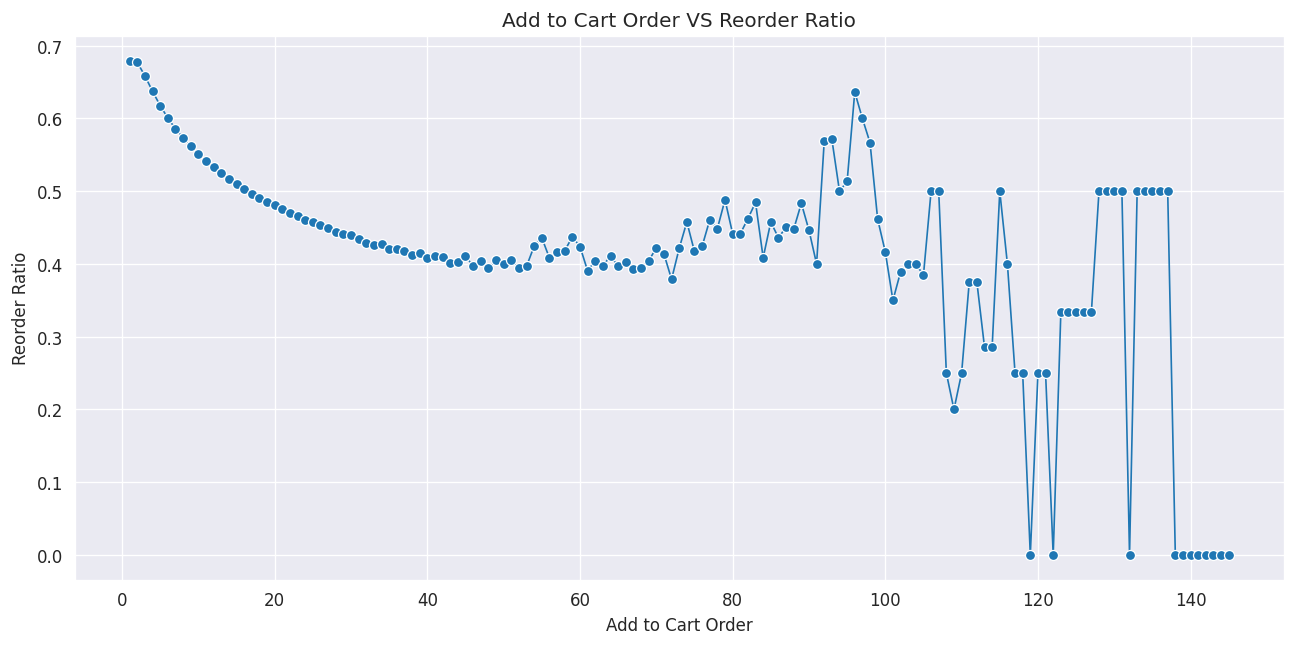

In [ ]:
temp_df = order_products.groupby('add_to_cart_order')['reordered'].mean().reset_index()
temp_df.head()
fig, ax = plt.subplots(figsize=(13,6))
ax = sns.lineplot(x=temp_df.add_to_cart_order, y=temp_df.reordered, lw = 1, marker='o')
ax.set_xlabel("Add to Cart Order")
ax.set_ylabel("Reorder Ratio")
ax.set_title("Add to Cart Order VS Reorder Ratio")
plt.show()

In [ ]:
order_products = order_products_prior.append(order_products_train)
order_products.shape
order_products.product_id.nunique()

49685

In [ ]:
product_counts = order_products.groupby('product_id')['order_id'].count().reset_index().rename(columns = {'order_id':'frequency'})
product_counts = product_counts.sort_values('frequency', ascending=False)[0:100].reset_index(drop = True)
product_counts = product_counts.merge(products, on = 'product_id', how = 'left')
product_counts.head(10)
freq_products = list(product_counts.product_id)
freq_products[1:10]

[13176, 21137, 21903, 47209, 47766, 47626, 16797, 26209, 27845]

In [ ]:
order_products = order_products[order_products.product_id.isin(freq_products)]
order_products.shape
order_products.order_id.nunique()
order_products = order_products.merge(products, on = 'product_id', how='left')
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,28985,2,1,Michigan Organic Kale,83,4
1,2,17794,6,1,Carrots,83,4
2,3,24838,2,1,Unsweetened Almondmilk,91,16
3,3,21903,4,1,Organic Baby Spinach,123,4
4,3,46667,6,1,Organic Ginger Root,83,4


In [ ]:
basket = order_products.groupby(['order_id', 'product_name'])['reordered'].count().unstack().reset_index().fillna(0).set_index('order_id')
basket.head()
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1 
    
basket = basket.applymap(encode_units)
basket.head()
frequent_items = apriori(basket, min_support=0.01, use_colnames=True)
frequent_items.head()
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
35,(Large Lemon),(Limes),0.065764,0.059984,0.011860,0.180345,3.006544,0.007915,1.146843
34,(Limes),(Large Lemon),0.059984,0.065764,0.011860,0.197723,3.006544,0.007915,1.164480
52,(Organic Strawberries),(Organic Raspberries),0.112711,0.058325,0.014533,0.128940,2.210731,0.007959,1.081069
53,(Organic Raspberries),(Organic Strawberries),0.058325,0.112711,0.014533,0.249174,2.210731,0.007959,1.181751
37,(Organic Avocado),(Large Lemon),0.075348,0.065764,0.010538,0.139862,2.126728,0.005583,1.086147
36,(Large Lemon),(Organic Avocado),0.065764,0.075348,0.010538,0.160244,2.126728,0.005583,1.101097
47,(Organic Strawberries),(Organic Blueberries),0.112711,0.042956,0.010235,0.090809,2.114024,0.005394,1.052633
46,(Organic Blueberries),(Organic Strawberries),0.042956,0.112711,0.010235,0.238274,2.114024,0.005394,1.164840
49,(Organic Raspberries),(Organic Hass Avocado),0.058325,0.090339,0.010966,0.188018,2.081257,0.005697,1.120298
48,(Organic Hass Avocado),(Organic Raspberries),0.090339,0.058325,0.010966,0.121389,2.081257,0.005697,1.071777
